In [4]:
import pandas as pd
import numpy as np

In [5]:
base = pd.read_csv('iris_dataset.csv')

In [6]:
base

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [97]:
base.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
x = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
labelencoder_y = LabelEncoder()

In [40]:
y = labelencoder_y.fit_transform(base.iloc[:, 4].values)

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [100]:
"""
0 ---> Iris-setosa
1 ---> Iris-versicolor
2 ---> Iris-virginica
""";

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 0)

In [50]:
y_train

array([0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1,
       1, 1, 0, 0, 0, 2, 1, 2, 0])

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
classificador = GaussianNB()

In [57]:
classificador.fit(x_train, y_train)

GaussianNB()

In [58]:
previsoes = classificador.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
eficacia = accuracy_score(y_test, previsoes)

In [83]:
print('Precisão do algorítmo: {:.1f}%'.format(eficacia*100))

Precisão do algorítmo: 94.7%


In [95]:
matriz = confusion_matrix(y_test, previsoes)

In [96]:
matriz

array([[21,  0,  0],
       [ 0, 30,  0],
       [ 0,  4, 20]], dtype=int64)

In [102]:
print(classificador.class_count_)

[29. 20. 26.]


In [120]:
print(list('{:.1f}%'.format(cl*100) for cl in classificador.class_prior_))

['38.7%', '26.7%', '34.7%']


In [85]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

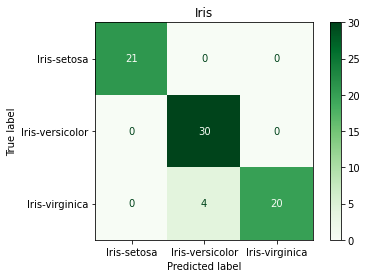

In [129]:
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
matrix = plot_confusion_matrix(classificador, x_test, y_test, cmap=plt.cm.Greens, 
                               display_labels=class_names)
matrix.ax_.set_title('Iris');